In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!python3 -m pip install paddlepaddle-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.0 MB 23 kB/s 
     |████████████████████████████████| 394 kB 64.7 MB/s 


In [3]:
!pip install "paddleocr>=2.0.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 29.3 MB/s 
     |████████████████████████████████| 604 kB 66.5 MB/s 
     |████████████████████████████████| 2.3 MB 57.2 MB/s 
     |████████████████████████████████| 4.9 MB 56.7 MB/s 
     |████████████████████████████████| 399 kB 34.0 MB/s 
     |████████████████████████████████| 104 kB 76.4 MB/s 
     |████████████████████████████████| 204 kB 80.2 MB/s 
     |████████████████████████████████| 2.3 MB 65.0 MB/s 


In [4]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory





download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3.86M/3.86M [00:04<00:00, 810kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:08<00:00, 1.22MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:04<00:00, 477kiB/s]

[2022/09/05 14:27:20] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

In [5]:
from google.colab.patches import cv2_imshow
import cv2

In [6]:
!wget https://i.pinimg.com/736x/1a/f4/ca/1af4ca470db1233812020306729bfccd.jpg

--2022-09-05 14:27:48--  https://i.pinimg.com/736x/1a/f4/ca/1af4ca470db1233812020306729bfccd.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.52.40.67, 23.52.40.42, 23.52.40.58, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.52.40.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37223 (36K) [image/jpeg]
Saving to: ‘1af4ca470db1233812020306729bfccd.jpg’

1af4ca470db12338120 100%[===================>]  36.35K  --.-KB/s    in 0.001s  

2022-09-05 14:27:48 (30.2 MB/s) - ‘1af4ca470db1233812020306729bfccd.jpg’ saved [37223/37223]



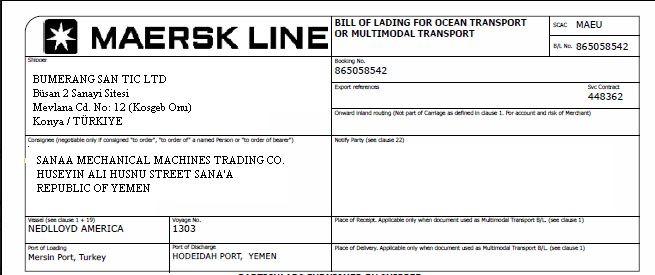

In [7]:

img_path = '/content/1af4ca470db1233812020306729bfccd.jpg'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [8]:
result = ocr.ocr(img_path, cls=True)
for line in result:
    print(line)

[2022/09/05 14:28:21] ppocr DEBUG: dt_boxes num : 28, elapse : 3.084052801132202
[2022/09/05 14:28:23] ppocr DEBUG: cls num  : 28, elapse : 1.7526371479034424
[2022/09/05 14:28:23] ppocr DEBUG: rec_res num  : 28, elapse : 0.13616633415222168
[[[334.0, 16.0], [528.0, 16.0], [528.0, 29.0], [334.0, 29.0]], ('BILLOF LADING FOR OCEAN TRANSPORT', 0.9370294213294983)]
[[[92.0, 27.0], [326.0, 27.0], [326.0, 47.0], [92.0, 47.0]], ('MAERSKLINE', 0.9549136161804199)]
[[[552.0, 19.0], [575.0, 19.0], [575.0, 30.0], [552.0, 30.0]], ('SCAC', 0.9889992475509644)]
[[[573.0, 19.0], [604.0, 19.0], [604.0, 30.0], [573.0, 30.0]], ('MAEU', 0.9965290427207947)]
[[[334.0, 29.0], [475.0, 29.0], [475.0, 38.0], [334.0, 38.0]], ('OR MULTIMODALTRANSPORT', 0.9746083617210388)]
[[[553.0, 41.0], [628.0, 41.0], [628.0, 52.0], [553.0, 52.0]], ('.865058542', 0.9195142984390259)]
[[[332.0, 64.0], [388.0, 64.0], [388.0, 74.0], [332.0, 74.0]], ('865058542', 0.9941960573196411)]
[[[335.0, 58.0], [365.0, 58.0], [365.0, 65.0]

In [9]:
# draw result
from PIL import Image, ImageDraw, ImageFont
image = Image.open(img_path).convert('RGB')

boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
font = ImageFont.load_default()
im_show = draw_ocr(image, boxes, txts, scores,font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')


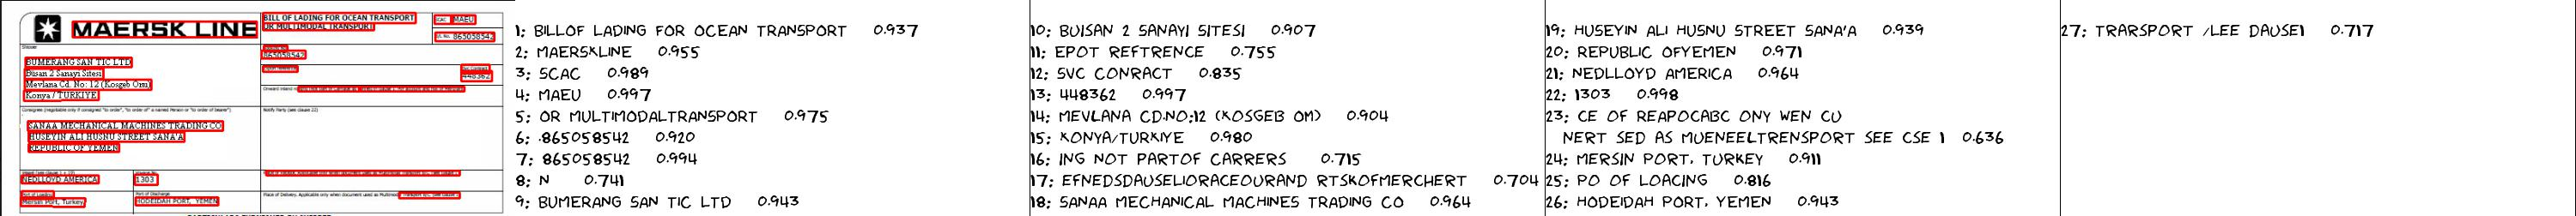

In [ ]:
img = cv2.imread('/content/result.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [10]:
!wget https://file.hstatic.net/1000246569/file/bill_thanh_toan_k80_41ac26602f4b497c9d8c4082fa15dd39_grande.jpg

--2022-09-05 14:29:10--  https://file.hstatic.net/1000246569/file/bill_thanh_toan_k80_41ac26602f4b497c9d8c4082fa15dd39_grande.jpg
Resolving file.hstatic.net (file.hstatic.net)... 172.67.14.191, 104.22.79.246, 104.22.78.246, ...
Connecting to file.hstatic.net (file.hstatic.net)|172.67.14.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28599 (28K) [image/jpeg]
Saving to: ‘bill_thanh_toan_k80_41ac26602f4b497c9d8c4082fa15dd39_grande.jpg’

bill_thanh_toan_k80 100%[===================>]  27.93K  --.-KB/s    in 0s      

2022-09-05 14:29:11 (81.2 MB/s) - ‘bill_thanh_toan_k80_41ac26602f4b497c9d8c4082fa15dd39_grande.jpg’ saved [28599/28599]



In [11]:

img_path = '/content/bill_thanh_toan_k80_41ac26602f4b497c9d8c4082fa15dd39_grande.jpg'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)
result = ocr.ocr(img_path, cls=True)
for line in result:
    print(line)
# draw result
image = Image.open(img_path).convert('RGB')

boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
font = ImageFont.load_default()
im_show = draw_ocr(image, boxes, txts, scores,font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')



[2022/09/05 14:29:38] ppocr DEBUG: dt_boxes num : 20, elapse : 0.02536916732788086
[2022/09/05 14:29:38] ppocr DEBUG: cls num  : 20, elapse : 0.022060155868530273
[2022/09/05 14:29:38] ppocr DEBUG: rec_res num  : 20, elapse : 0.05620098114013672
[[[60.0, 14.0], [210.0, 15.0], [209.0, 32.0], [60.0, 31.0]], ('NHA HANG HACODE', 0.9513248801231384)]
[[[18.0, 51.0], [252.0, 51.0], [252.0, 65.0], [18.0, 65.0]], ('Dia chiHao Nam-Dong Da-HN', 0.9462287425994873)]
[[[47.0, 114.0], [223.0, 114.0], [223.0, 134.0], [47.0, 134.0]], ('PHIEU TINH TIEN', 0.9420899748802185)]
[[[5.0, 212.0], [33.0, 212.0], [33.0, 227.0], [5.0, 227.0]], ('Ten', 0.9964156746864319)]
[[[73.0, 212.0], [89.0, 212.0], [89.0, 226.0], [73.0, 226.0]], ('SL', 0.8096508979797363)]
[[[107.0, 211.0], [162.0, 211.0], [162.0, 228.0], [107.0, 228.0]], ('Don gia', 0.981718122959137)]
[[[184.0, 210.0], [254.0, 210.0], [254.0, 227.0], [184.0, 227.0]], ('Thanh tien', 0.9481525421142578)]
[[[5.0, 244.0], [33.0, 244.0], [33.0, 259.0], [5.0,

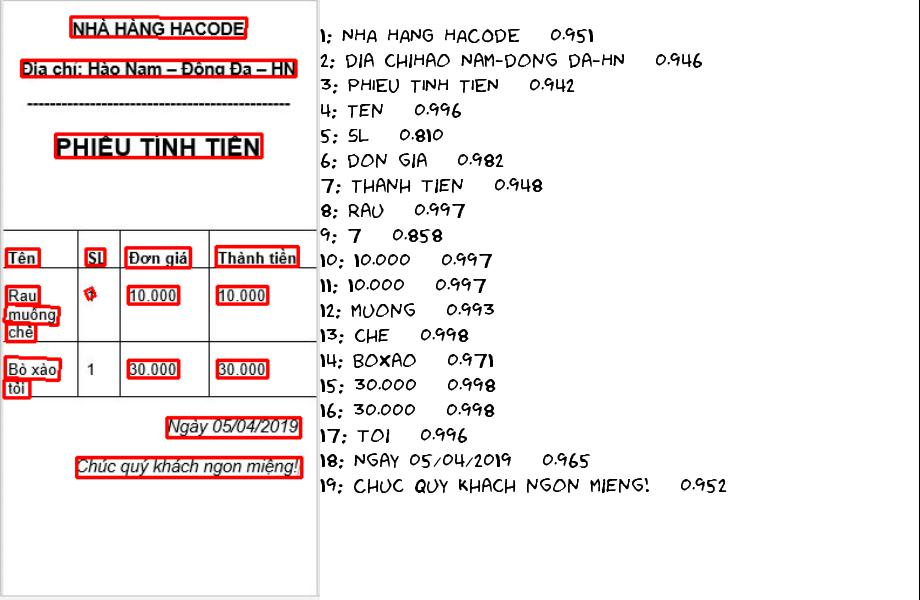

In [12]:
img_path = '/content/result.jpg'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)